# HR ANALYTICSS PROJECT - Understanding the Attrition in HR

### Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

### HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

### Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

### Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df=pd.read_csv('HRA_data.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


Imported the dataset

In [13]:
df.shape

(1470, 35)

As we can see here there are 1470 rows and 35 columns in thiis dataset.

In [14]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

There are two data types in this dataset which are object and integer.

In [15]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Studying of dataset is done here

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

This gives detailed information about the whole dataset

In [17]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

This dataset has no null values 

In [18]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Getting the summary of the dataset

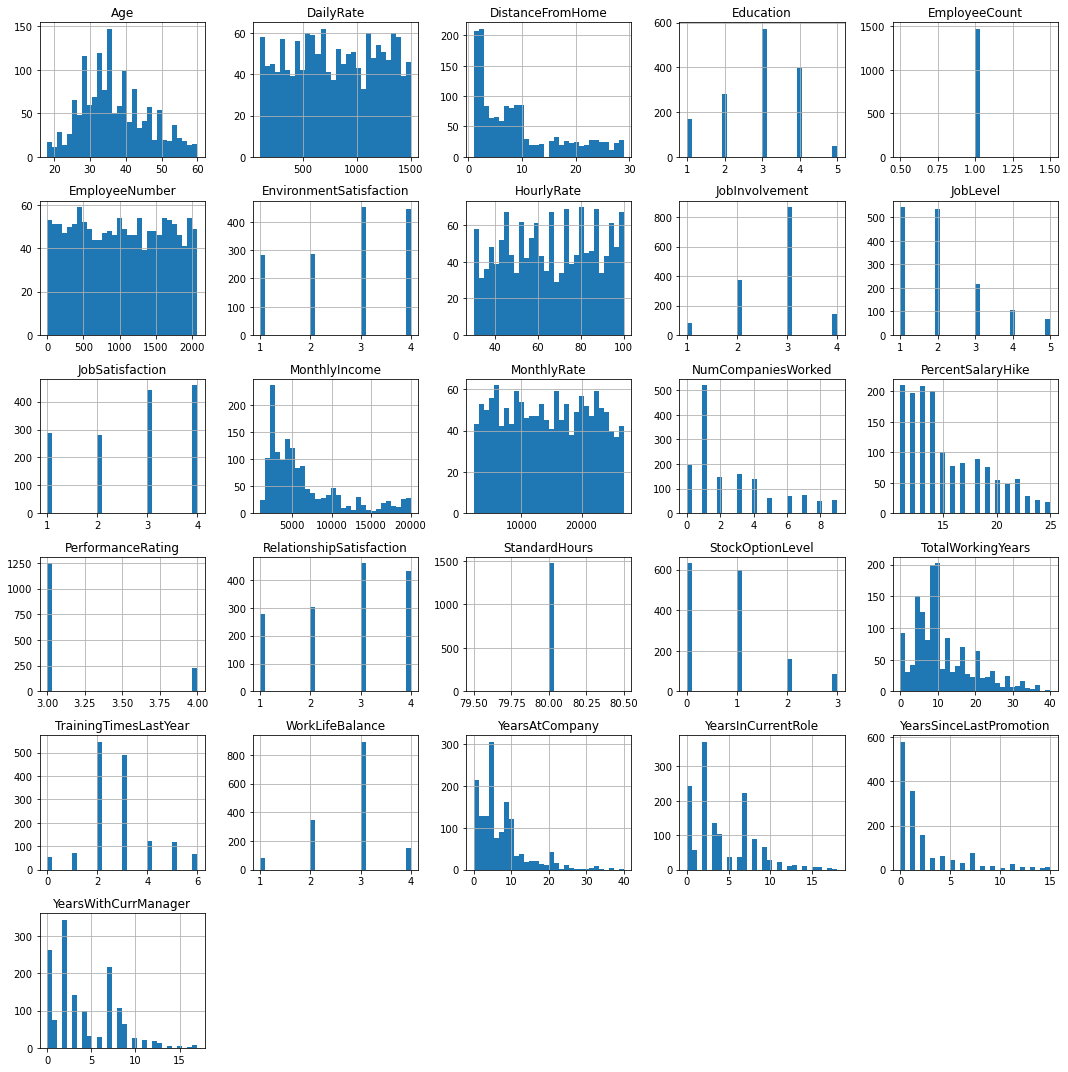

In [19]:
pd.DataFrame.hist(df,bins=30, figsize=(15,15))
plt.tight_layout()
plt.show();

Text(0.5, 1.0, 'Counts of attrition')

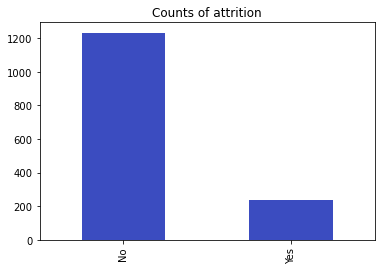

In [20]:
pd.value_counts(df['Attrition']).plot(kind = 'bar',cmap = 'coolwarm')
plt.title("Counts of attrition")

Looking at the counts of the two value options for attrition (the count of the "No" class of the target variable is substantially higher):

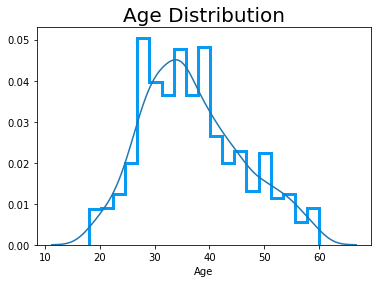

In [21]:
sns.distplot(df.Age, kde=True, label='YearsInCurrentRole', hist_kws={"histtype": "step", "linewidth": 3,
                  "alpha": 1, "color": sns.xkcd_rgb["azure"]})
plt.title('Age Distribution', fontsize=20)      
plt.show()    

This graph shows that it normally distributed

Some features are highly correlated(multicollinearity). Those may need to be removed later during modeling due to possible model instability.

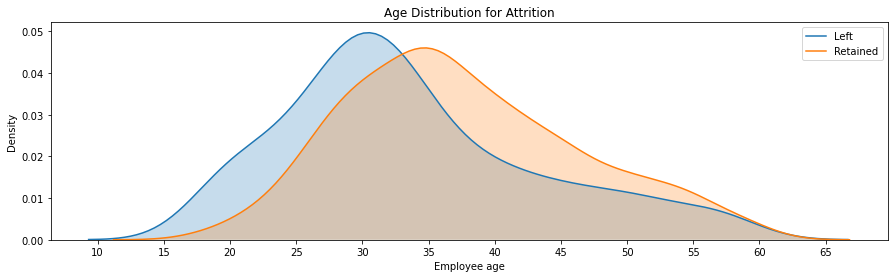

In [22]:
f,ax = plt.subplots(figsize=(15,4))
sns.kdeplot(df.loc[df.Attrition == "Yes", "Age"], shade = True, label = "Left")
sns.kdeplot(df.loc[df.Attrition == "No", "Age"], shade = True, label = "Retained")
ax.set(xlabel = "Employee age", ylabel = "Density",title = "Age Distribution for Attrition")
ax.set_xticks(range(10, 70, 5))
plt.show()


From the plot, retained employees have their age distribution shifted to the right, as compared to the non-retained sample participants.

### Checking the corelation heatmap

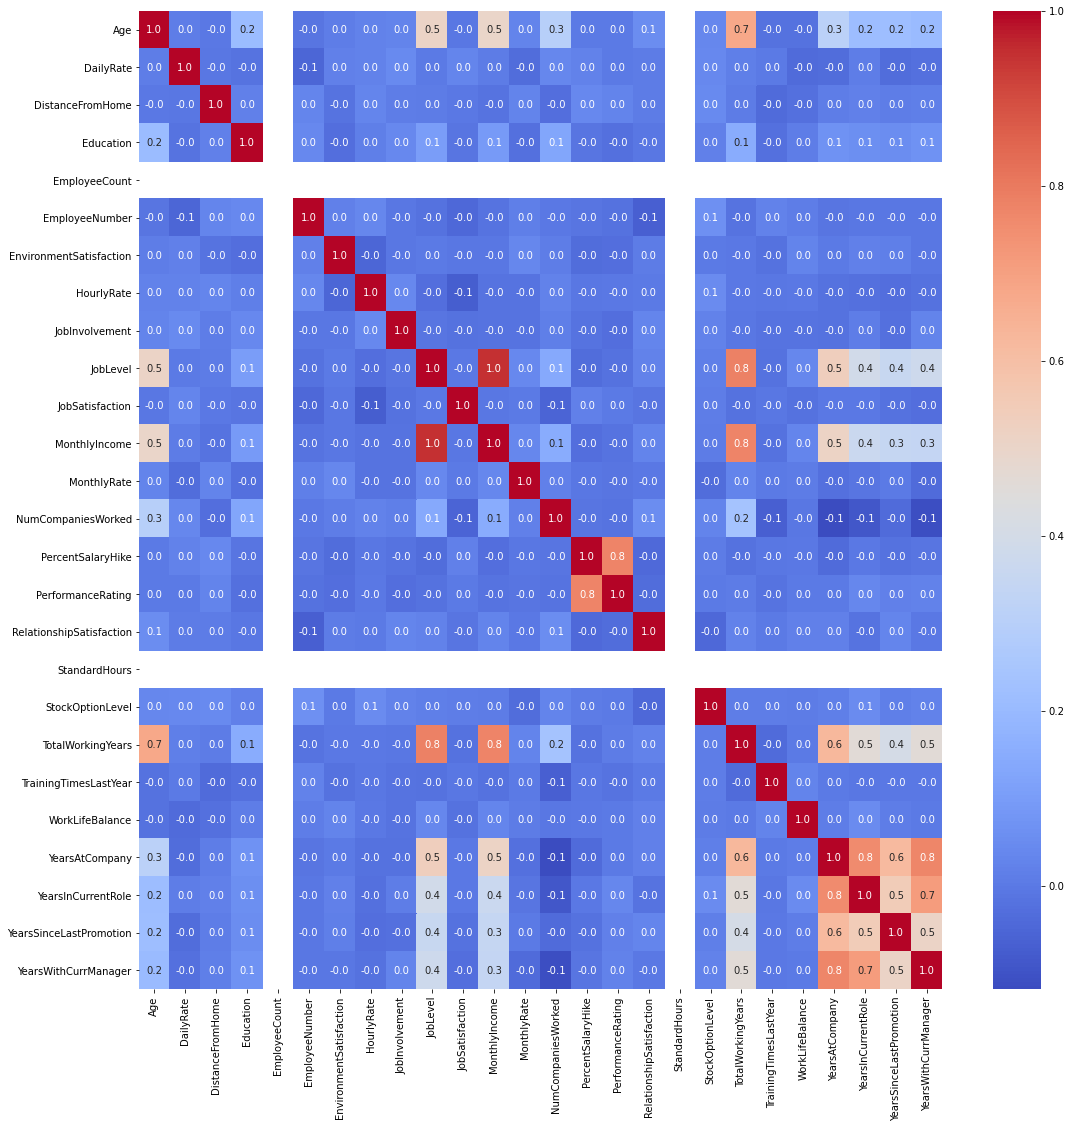

<Figure size 1296x1296 with 0 Axes>

In [23]:
f,ax = plt.subplots(figsize=(18, 18))
correlations = df.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(correlations, fmt= '.1f',annot=True,ax=ax, cmap='coolwarm')
plt.show();

## Correlations

In [24]:
df_corr = df.copy()
df_corr['Target'] = df_corr['Attrition'].apply(lambda x: 0 if x == 'No' else 1)
df_corr = df_corr.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
correlations = df_corr.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


In [25]:
corr = df_corr.corr()
corr

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Target
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.006846
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.130016
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.169105
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,-0.103481
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079,-0.159840


Comple Correlation table

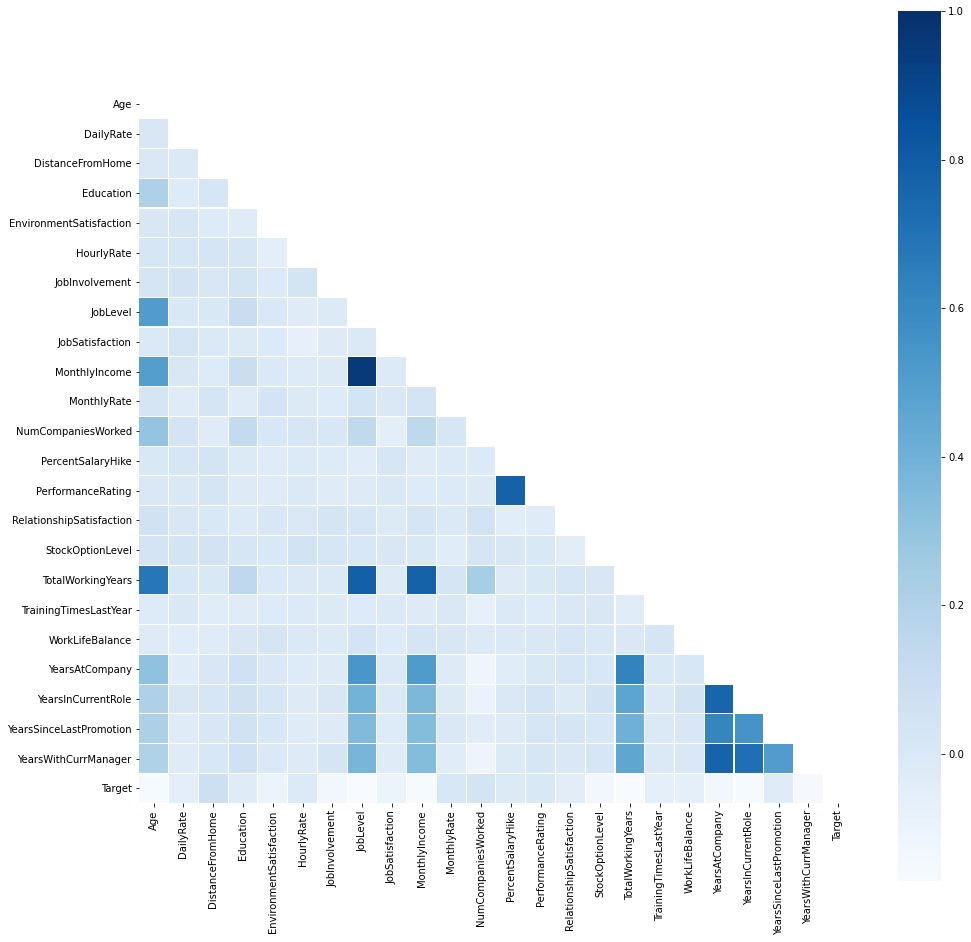

In [26]:
plt.figure(figsize=(16, 16))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig = sns.heatmap(corr, vmax=1, square=True, cmap="Blues", linewidths=.1, annot=False, mask=mask)
plt.show()

Exanined some of the most significant correlations between the featues and calcuated the correlation matrix.

## Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# le = OneHotEncoder()

In [28]:
df = df.apply(LabelEncoder().fit_transform)


In [31]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,0,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,0,1,...,3,0,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,0,2,...,1,0,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,0,3,...,2,0,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,4,...,3,0,1,6,3,2,2,2,2,2


In [32]:
df.shape

(1470, 35)

In [33]:
df['BusinessTravel'].drop(3)

0       2
1       1
2       2
4       2
5       1
       ..
1465    1
1466    2
1467    2
1468    1
1469    2
Name: BusinessTravel, Length: 1469, dtype: int32

In [34]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,0,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,0,1,...,3,0,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,0,2,...,1,0,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,0,3,...,2,0,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,4,...,3,0,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,1,3,0,1465,...,2,0,1,17,3,2,5,2,0,3
1466,21,0,2,327,1,5,0,3,0,1466,...,0,0,1,9,5,2,7,7,1,7
1467,9,0,2,39,1,3,2,1,0,1467,...,1,0,1,6,0,2,6,2,0,3
1468,31,0,1,579,2,1,2,3,0,1468,...,3,0,0,17,3,1,9,6,0,8


In [36]:
x = df.drop(columns = ["Attrition"], axis=1)

In [41]:
y = df["Attrition"]
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

### Checking for skewness

In [37]:
x.skew()

Age                         0.413286
BusinessTravel             -1.439006
DailyRate                   0.000930
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.000000
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.060816
MonthlyRate                 0.012315
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
T

## Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.4463504 ,  0.59004834,  0.71391447, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [ 1.32236521, -0.91319439, -1.30244563, ...,  0.76499762,
        -0.36871529,  0.80654148],
       [ 0.008343  ,  0.59004834,  1.42812421, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [-1.08667552,  0.59004834, -1.59444298, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [ 1.32236521, -0.91319439,  0.53634851, ...,  0.48889978,
        -0.67914568,  1.08689522],
       [-0.32016256,  0.59004834, -0.42250766, ..., -0.33939374,
        -0.36871529, -0.59522723]])

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 200)


## Creating various output classification models

###  Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

y_pred = log_reg.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8344671201814059
[[358  10]
 [ 63  10]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       368
           1       0.50      0.14      0.22        73

    accuracy                           0.83       441
   macro avg       0.68      0.55      0.56       441
weighted avg       0.79      0.83      0.79       441



### Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7936507936507936
[[323  45]
 [ 46  27]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       368
           1       0.38      0.37      0.37        73

    accuracy                           0.79       441
   macro avg       0.63      0.62      0.62       441
weighted avg       0.79      0.79      0.79       441



### Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.854875283446712
[[365   3]
 [ 61  12]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       368
           1       0.80      0.16      0.27        73

    accuracy                           0.85       441
   macro avg       0.83      0.58      0.60       441
weighted avg       0.85      0.85      0.81       441



### Gradient Boosting Classifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

gb_class = GradientBoostingClassifier()
gb_class.fit(x_train,y_train)

y_pred = gb_class.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8458049886621315
[[355  13]
 [ 55  18]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       368
           1       0.58      0.25      0.35        73

    accuracy                           0.85       441
   macro avg       0.72      0.61      0.63       441
weighted avg       0.82      0.85      0.82       441



### Extra Trees Classifier

In [49]:
from sklearn.ensemble import ExtraTreesClassifier

ex_reg = ExtraTreesClassifier()
ex_reg.fit(x_train,y_train)

y_pred = ex_reg.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8526077097505669
[[366   2]
 [ 63  10]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       368
           1       0.83      0.14      0.24        73

    accuracy                           0.85       441
   macro avg       0.84      0.57      0.58       441
weighted avg       0.85      0.85      0.81       441



## Cross validation to check if its overfitting

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
scr = cross_val_score(log_reg, x, y, cv=5)
print("Cross Validation score of LogisticRegression model is:", scr.mean())

Cross Validation score of LogisticRegression model is: 0.8421768707482993


In [52]:
scr = cross_val_score(dt, x, y, cv=5)
print("Cross Validation score of DecisionTree model is:", scr.mean())

Cross Validation score of DecisionTree model is: 0.7836734693877551


In [53]:
scr = cross_val_score(rf, x, y, cv=5)
print("Cross Validation score of RandomForestClassifier model is:", scr.mean())

Cross Validation score of RandomForestClassifier model is: 0.8585034013605443


In [54]:
scr = cross_val_score(gb_class, x, y, cv=5)
print("Cross Validation score of GradientBoostingClassifier model is:", scr.mean())

Cross Validation score of GradientBoostingClassifier model is: 0.8625850340136054


In [55]:
scr = cross_val_score(gb_class, x, y, cv=5)
print("Cross Validation score of GradientBoostingClassifier model is:", scr.mean())

Cross Validation score of GradientBoostingClassifier model is: 0.8619047619047618


### Here we will take the difference of Model Accuracy and Cross Validation and choose which has the lowest difference

### We should go with Logistic Regression as the difference is lower compared to other models

# Hyper Parameter Tuning Parameters

### The "paramaters" have been selected from the skicit library and I have considered 6 paramaters

In [56]:
parameters = {"penalty":["l1", "l2", "elasticnet", "none"],
              "tol":[1e-4, 1e-2, 1e-3, 1e-1],
              "intercept_scaling":[1, 2, 3, 4, 5],
              "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
              "multi_class":["auto", "ovr", "multinomial"],
              "max_iter":[50, 70, 100, 120, 130],
              "intercept_scaling":[1, 2, 3, 4, 5]
              }

# GridSearchCV is used to tune the parameters by fitting with same training dataset

In [57]:
from sklearn.model_selection import GridSearchCV
GCV = GridSearchCV(LogisticRegression(), parameters, cv=5)

In [58]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'intercept_scaling': [1, 2, 3, 4, 5],
                         'max_iter': [50, 70, 100, 120, 130],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 0.01, 0.001, 0.1]})

In [59]:
GCV.best_params_

{'intercept_scaling': 5,
 'max_iter': 50,
 'multi_class': 'auto',
 'penalty': 'l2',
 'solver': 'liblinear',
 'tol': 0.001}

In [60]:
mod_log_reg = LogisticRegression(intercept_scaling= 5, max_iter= 70, multi_class="ovr", penalty= "l1", solver= "liblinear", tol =0.001)

mod_log_reg.fit(x_train,y_train)
pred = mod_log_reg.predict(x_test)
print(accuracy_score(y_test,pred)*100)

85.4875283446712


### This is the best accuracy we can get with the help of Linear Regression Model

# Saving the model

In [61]:
import joblib
joblib.dump(mod_log_reg,"HR_Analytics.pkl")

['HR_Analytics.pkl']

# Conclusion

- In the current research project the analysis of the HR employee attrition dataset was conducted, in order to define the factors most contributing to the attrition of employees in companies, and find the models that are most suatable for indentifying the attrition intentions. One additional consideration was to take into account the imbalance in classes present in the distribution of the target variable. As it was shown in the report, the model with the highest values of recall for the positive attrition and the lowest difference between the training and testing accuracies was the gradient boosing model. However, the outcomes of the analysis should be taken with caution in applying to real world problems, as the dataset is fictatious and also doesn't take into account the external drivers of attrition and the temporal component.

- Some of the further considerations for the related analysis would be to obtain a time series or, better, a longitufinal dataset, and research a wider set of external environmental variables related to the dynamics of the economy or legislation. Furthermore, while lower employee turnover is a positive thing for companies, as it reduces recruitment costs and improves operational efficiency, retention is not necessarily desirable for all the employee types. For this reason, in practice it could be advisable to first define the set of most valuable employees with the help of algorithms, such as for instance clustering or classification. Then, identifying their churn-related characteristics should be performed as a second step.